In [1]:
set.seed(42)
train_set = read.delim("data/train_set.txt", sep = " ")
test_set = read.delim("data/test_set.txt", sep = " ")

train_set["rain"] = NULL
train_set["rain_log"] = NULL

test_set["rain"] = NULL
test_set["rain_log"] = NULL

# WE WILL DELETE ALL MONTH VARIABLES
month_names = paste("month", 2:12, sep = "")
train_set[, month_names] = NULL
test_set[, month_names] = NULL

train_set[,"rain_class"] = as.factor(train_set[,"rain_class"])
test_set[,"rain_class"] = as.factor(test_set[,"rain_class"])

n_train = nrow(train_set)

In [ ]:
labels_to_num = function(labels){
    n = length(labels)
    num = rep(0, times = n)
    num[labels == 'no_rain'] = 1
    num[labels == 'low_rain'] = 2
    num[labels == 'high_rain'] = 3
    return(num)
}

In [2]:
exp_var = setdiff(names(train_set), c("rain_class"))
exp_var

[1] "ff"           "t"            "td"           "hu"           "dd"          
 [6] "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"    "v10_arome"   
[11] "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log" "msl_arome"

In [56]:
x_train = train_set[, exp_var]
x_test = test_set[, exp_var]

y_train = as.factor(train_set[,"rain_class"])
y_test = as.factor(test_set[,"rain_class"])

y_train_num = labels_to_num(y_train)
y_test_num = labels_to_num(y_test)

In [4]:
library(rpart)

In [5]:
confusion_matrix = function(pred_class, true_class){
    tab = table(pred_class, true_class)
    print("Confusion matrix")
    print(tab)
    acc = sum(diag(tab)) / sum(tab)
    print(paste("Prediction accuracy : ", acc))
}

## 5.2. Decision Tree

In [6]:
tree = rpart(rain_class ~ ., data = train_set, control = rpart.control(cp = 0.001, nsplit = 15), method = "class")
summary(tree)

Call:
rpart(formula = rain_class ~ ., data = train_set, method = "class", 
    control = rpart.control(cp = 0.001, nsplit = 15))
  n= 550 

            CP nsplit rel error    xerror       xstd
1  0.085443038      0 1.0000000 1.0000000 0.03669298
2  0.044303797      2 0.8291139 0.8829114 0.03710379
3  0.031645570      4 0.7405063 0.8702532 0.03710772
4  0.018987342      5 0.7088608 0.8734177 0.03710747
5  0.015822785      6 0.6898734 0.8765823 0.03710674
6  0.012658228      7 0.6740506 0.8797468 0.03710551
7  0.011867089      9 0.6487342 0.8702532 0.03710772
8  0.009493671     13 0.6012658 0.8670886 0.03710747
9  0.007911392     16 0.5727848 0.8829114 0.03710379
10 0.006329114     23 0.5158228 0.8829114 0.03710379
11 0.005274262     25 0.5031646 0.8702532 0.03710772
12 0.004746835     28 0.4873418 0.8639241 0.03710674
13 0.003164557     30 0.4778481 0.8765823 0.03710674
14 0.001000000     31 0.4746835 0.8892405 0.03709889

Variable importance
   u10_arome           hu    msl_arome      

In [7]:
summary(tree)$variable.importance

Call:
rpart(formula = rain_class ~ ., data = train_set, method = "class", 
    control = rpart.control(cp = 0.001, nsplit = 15))
  n= 550 

            CP nsplit rel error    xerror       xstd
1  0.085443038      0 1.0000000 1.0000000 0.03669298
2  0.044303797      2 0.8291139 0.8829114 0.03710379
3  0.031645570      4 0.7405063 0.8702532 0.03710772
4  0.018987342      5 0.7088608 0.8734177 0.03710747
5  0.015822785      6 0.6898734 0.8765823 0.03710674
6  0.012658228      7 0.6740506 0.8797468 0.03710551
7  0.011867089      9 0.6487342 0.8702532 0.03710772
8  0.009493671     13 0.6012658 0.8670886 0.03710747
9  0.007911392     16 0.5727848 0.8829114 0.03710379
10 0.006329114     23 0.5158228 0.8829114 0.03710379
11 0.005274262     25 0.5031646 0.8702532 0.03710772
12 0.004746835     28 0.4873418 0.8639241 0.03710674
13 0.003164557     30 0.4778481 0.8765823 0.03710674
14 0.001000000     31 0.4746835 0.8892405 0.03709889

Variable importance
   u10_arome           hu    msl_arome      

u10_arome           hu    msl_arome           dd  p3031_arome tp_arome_log 
    39.34045     37.47504     35.42458     31.70332     30.64921     28.85287 
  precip_log            t    t2m_arome     ws_arome           td    d2m_arome 
    28.66893     28.49728     24.27877     22.68688     21.78570     20.11613 
     r_arome    v10_arome           ff 
    19.94201     16.51605     13.96059

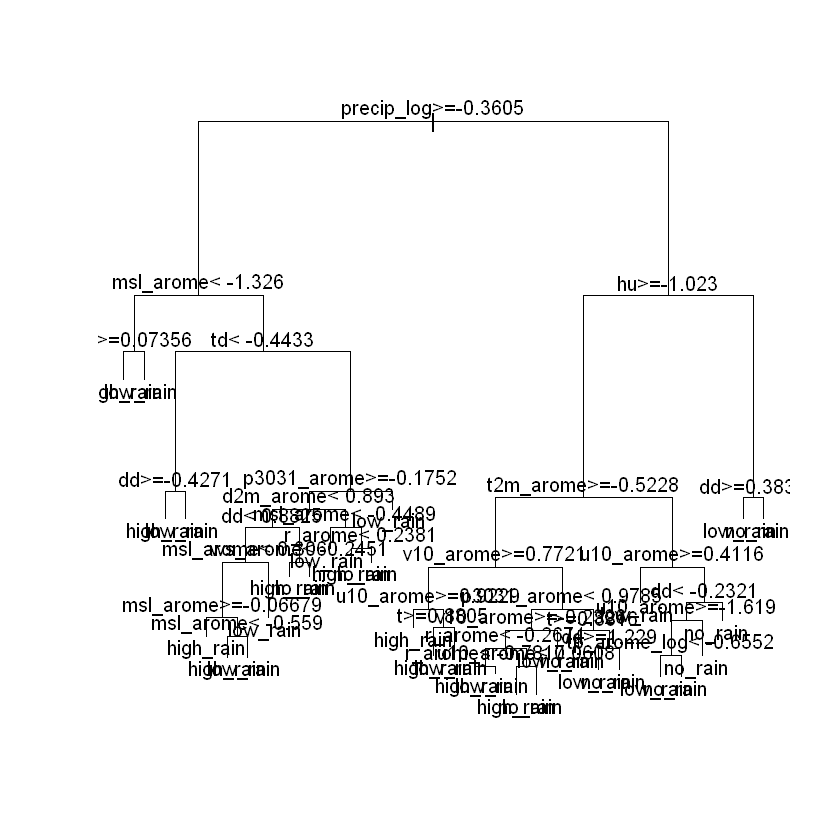

In [8]:
plot(tree)
text(tree)

In [9]:
confusion_matrix(predict(tree, newdata = train_set, type = "class"), y_train)
confusion_matrix(predict(tree, newdata = test_set, type = "class"), y_test)

[1] "Confusion matrix"
           true_class
pred_class  high_rain low_rain no_rain
  high_rain       123       33       9
  low_rain         14      164      39
  no_rain          18       37     113
[1] "Prediction accuracy :  0.727272727272727"
[1] "Confusion matrix"
           true_class
pred_class  high_rain low_rain no_rain
  high_rain        16       16       9
  low_rain         12       26      20
  no_rain           5       16      18
[1] "Prediction accuracy :  0.434782608695652"


#### Cross validation

In [10]:
y_train_num = rep(0, times = n_train)
y_train_num[y_train == 'no_rain'] = 1
y_train_num[y_train == 'low_rain'] = 2
y_train_num[y_train == 'high_rain'] = 3

In [11]:
get_train_acc = function(pred_class){
    tab = table(pred_class, y_train_num)
    acc = sum(diag(tab)) / sum(tab)
    return(acc)
}

In [14]:
xmat = xpred.rpart(tree)
train_acc = apply(xmat, 2, get_train_acc)


The optimal `cp` is determined by the following

In [15]:
optimal.cp = as.numeric(attributes(which.min(train_acc))$names)
optimal.cp

[1] 0.007076164

In [16]:
optimal.tree = rpart(rain_class ~ ., data = train_set, control = rpart.control(cp = optimal.cp, nsplit = 15), method = "class")
summary(optimal.tree)

Call:
rpart(formula = rain_class ~ ., data = train_set, method = "class", 
    control = rpart.control(cp = optimal.cp, nsplit = 15))
  n= 550 

            CP nsplit rel error    xerror       xstd
1  0.085443038      0 1.0000000 1.0000000 0.03669298
2  0.044303797      2 0.8291139 0.9177215 0.03705248
3  0.031645570      4 0.7405063 0.8765823 0.03710674
4  0.018987342      5 0.7088608 0.8892405 0.03709889
5  0.015822785      6 0.6898734 0.9240506 0.03703675
6  0.012658228      7 0.6740506 0.9303797 0.03701905
7  0.011867089      9 0.6487342 0.9398734 0.03698878
8  0.009493671     13 0.6012658 0.9398734 0.03698878
9  0.007911392     16 0.5727848 0.9335443 0.03700945
10 0.007076164     23 0.5158228 0.9335443 0.03700945

Variable importance
   u10_arome           hu    msl_arome   precip_log           dd  p3031_arome 
          10            9            9            8            8            8 
tp_arome_log            t    t2m_arome           td    d2m_arome     ws_arome 
           8  

In [17]:
confusion_matrix(predict(optimal.tree, newdata = train_set, type = "class"), y_train)
confusion_matrix(predict(optimal.tree, newdata = test_set, type = "class"), y_test)

[1] "Confusion matrix"
           true_class
pred_class  high_rain low_rain no_rain
  high_rain       108       26       7
  low_rain         23      172      47
  no_rain          24       36     107
[1] "Prediction accuracy :  0.703636363636364"
[1] "Confusion matrix"
           true_class
pred_class  high_rain low_rain no_rain
  high_rain        16       14       7
  low_rain         12       28      23
  no_rain           5       16      17
[1] "Prediction accuracy :  0.442028985507246"


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



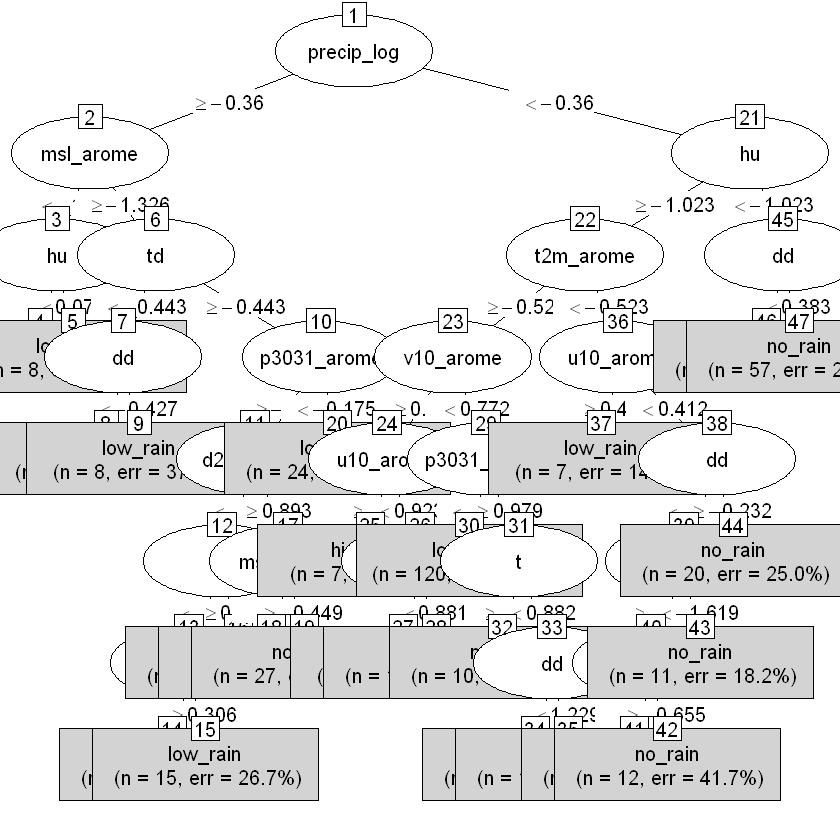

In [18]:
library(partykit)
plot(as.party(optimal.tree), type = "simple")

## Aggregation of Models - Random Forest


In [19]:
library(randomForest)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.



In [20]:
help(randomForest)

randomForest           package:randomForest            R Documentation

_C_l_a_s_s_i_f_i_c_a_t_i_o_n _a_n_d _R_e_g_r_e_s_s_i_o_n _w_i_t_h _R_a_n_d_o_m _F_o_r_e_s_t

_D_e_s_c_r_i_p_t_i_o_n:

     'randomForest' implements Breiman's random forest algorithm (based
     on Breiman and Cutler's original Fortran code) for classification
     and regression.  It can also be used in unsupervised mode for
     assessing proximities among data points.

_U_s_a_g_e:

     ## S3 method for class 'formula'
     randomForest(formula, data=NULL, ..., subset, na.action=na.fail)
     ## Default S3 method:
     randomForest(x, y=NULL,  xtest=NULL, ytest=NULL, ntree=500,
                  mtry=if (!is.null(y) && !is.factor(y))
                  max(floor(ncol(x)/3), 1) else floor(sqrt(ncol(x))),
                  weights=NULL,
                  replace=TRUE, classwt=NULL, cutoff, strata,
                  sampsize = if (replace) nrow(x) else ceili

In [21]:
random.forest = randomForest(rain_class ~ ., data = train_set, xtest = x_test, ytest = y_test, 
        ntree = 500, do.trace = 50, importance = TRUE)

ntree      OOB      1      2      3|    Test      1      2      3
   50:  47.82% 47.74% 39.32% 60.25%|  50.72% 42.42% 37.93% 72.34%
  100:  48.73% 44.52% 44.02% 59.63%|  51.45% 39.39% 41.38% 72.34%
  150:  46.55% 44.52% 39.32% 59.01%|  52.90% 36.36% 44.83% 74.47%
  200:  47.09% 45.81% 37.61% 62.11%|  50.00% 39.39% 41.38% 68.09%
  250:  47.27% 45.16% 38.03% 62.73%|  49.28% 39.39% 37.93% 70.21%
  300:  47.82% 46.45% 39.32% 61.49%|  49.28% 39.39% 37.93% 70.21%
  350:  48.91% 47.10% 40.60% 62.73%|  48.55% 39.39% 36.21% 70.21%
  400:  48.00% 45.16% 39.74% 62.73%|  49.28% 39.39% 37.93% 70.21%
  450:  47.82% 43.87% 39.74% 63.35%|  50.72% 42.42% 39.66% 70.21%
  500:  47.64% 45.16% 39.32% 62.11%|  50.72% 42.42% 39.66% 70.21%


 Number of variables randomly sampled as candidates at each split by default is

In [22]:
random.forest$confusion

,high_rain,low_rain,no_rain,class.error
high_rain,85,54,16,0.4516129
low_rain,45,142,47,0.3931624
no_rain,15,85,61,0.6211180


In [23]:
head(random.forest$err.rate)

OOB,high_rain,low_rain,no_rain
0.5099010,0.5714286,0.4487179,0.5245902
0.5030488,0.5247525,0.4496124,0.5510204
0.5288462,0.5203252,0.5491329,0.5083333
0.5401302,0.5111111,0.5368421,0.5735294
0.5272727,0.5035461,0.5117371,0.5744681
0.5320388,0.5000000,0.4955357,0.6174497


In [24]:
attributes(random.forest)
random.forest$mtry

$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 3

We will test different values of this hyperparameter to see the influences to the error rate

In [25]:
randomForest(rain_class ~ ., data = train_set, xtest = x_test, ytest = y_test, 
        ntree = 500, do.trace = 50, importance = TRUE, mtry = 6)

ntree      OOB      1      2      3|    Test      1      2      3
   50:  46.91% 43.87% 40.60% 59.01%|  47.10% 39.39% 37.93% 63.83%
  100:  48.00% 45.16% 40.17% 62.11%|  50.72% 42.42% 43.10% 65.96%
  150:  49.27% 47.10% 39.74% 65.22%|  47.10% 36.36% 39.66% 63.83%
  200:  49.09% 49.03% 38.89% 63.98%|  47.10% 36.36% 39.66% 63.83%
  250:  48.55% 46.45% 40.17% 62.73%|  49.28% 39.39% 41.38% 65.96%
  300:  48.73% 45.81% 40.17% 63.98%|  49.28% 39.39% 41.38% 65.96%
  350:  48.00% 44.52% 39.32% 63.98%|  49.28% 39.39% 41.38% 65.96%
  400:  47.09% 44.52% 37.61% 63.35%|  48.55% 36.36% 41.38% 65.96%
  450:  47.64% 45.16% 37.61% 64.60%|  50.72% 42.42% 41.38% 68.09%
  500:  48.36% 45.81% 39.74% 63.35%|  50.00% 39.39% 41.38% 68.09%



Call:
 randomForest(formula = rain_class ~ ., data = train_set, xtest = x_test,      ytest = y_test, ntree = 500, do.trace = 50, importance = TRUE,      mtry = 6) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 48.36%
Confusion matrix:
          high_rain low_rain no_rain class.error
high_rain        84       52      19   0.4580645
low_rain         42      141      51   0.3974359
no_rain          14       88      59   0.6335404
                Test set error rate: 50%
Confusion matrix:
          high_rain low_rain no_rain class.error
high_rain        20       12       1   0.3939394
low_rain         10       34      14   0.4137931
no_rain          10       22      15   0.6808511

In [26]:
randomForest(rain_class ~ ., data = train_set, xtest = x_test, ytest = y_test, 
        ntree = 500, do.trace = 50, importance = TRUE, mtry = 6)

ntree      OOB      1      2      3|    Test      1      2      3
   50:  49.64% 47.10% 41.03% 64.60%|  51.45% 39.39% 43.10% 70.21%
  100:  48.55% 46.45% 40.60% 62.11%|  53.62% 42.42% 48.28% 68.09%
  150:  50.00% 46.45% 44.44% 61.49%|  52.90% 42.42% 44.83% 70.21%
  200:  49.82% 46.45% 41.45% 65.22%|  53.62% 42.42% 46.55% 70.21%
  250:  49.64% 45.81% 44.02% 61.49%|  52.17% 42.42% 44.83% 68.09%
  300:  48.36% 45.16% 41.88% 60.87%|  52.17% 39.39% 44.83% 70.21%
  350:  48.73% 44.52% 43.16% 60.87%|  50.72% 39.39% 43.10% 68.09%
  400:  49.64% 46.45% 43.59% 61.49%|  51.45% 39.39% 43.10% 70.21%
  450:  50.36% 45.81% 44.87% 62.73%|  52.17% 42.42% 43.10% 70.21%
  500:  50.00% 45.81% 44.02% 62.73%|  50.00% 39.39% 41.38% 68.09%



Call:
 randomForest(formula = rain_class ~ ., data = train_set, xtest = x_test,      ytest = y_test, ntree = 500, do.trace = 50, importance = TRUE,      mtry = 6) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 50%
Confusion matrix:
          high_rain low_rain no_rain class.error
high_rain        84       57      14   0.4580645
low_rain         48      131      55   0.4401709
no_rain          14       87      60   0.6273292
                Test set error rate: 50%
Confusion matrix:
          high_rain low_rain no_rain class.error
high_rain        20       12       1   0.3939394
low_rain         10       34      14   0.4137931
no_rain           9       23      15   0.6808511

#### Importance of the variables

In [27]:
random.forest$importance

,high_rain,low_rain,no_rain,MeanDecreaseAccuracy,MeanDecreaseGini
ff,0.007000334,0.0033496144,0.0004549657,0.003509212,20.74354
t,0.020285221,0.0051462466,0.0014310580,0.008412070,20.89915
td,0.016974337,0.0025511309,0.0020071081,0.006177642,20.09209
hu,0.020386373,0.0003222457,0.0293322880,0.014564497,27.79661
dd,0.020007475,0.0052771510,0.0114245554,0.011031222,24.13160
precip_log,0.059073865,-0.0032508552,0.0442073336,0.028228409,22.99057
ws_arome,0.013802367,0.0077711236,-0.0019284150,0.006602900,23.08476
p3031_arome,0.025159464,0.0062512308,0.0139663107,0.013659275,24.90123
u10_arome,0.024406958,0.0119463444,0.0164484387,0.016577757,26.64370
v10_arome,0.015155242,0.0025476588,0.0038839688,0.006432752,23.37110


## Boosting

In [67]:
library(xgboost)
library(caret)
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:xgboost':

    slice


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Transform the class to the numeric values ranged from $0$ to number of class and define the data matrices for this XGBoost model

In [57]:
train_matrix <- xgb.DMatrix(data = as.matrix(x_train), label = y_train_num - 1)
test_matrix <- xgb.DMatrix(data = as.matrix(x_test), label = y_test_num - 1)

Define some parameters of the model

In [58]:
xgb_params <- list("objective" = "multi:softprob", "eval_metric" = "mlogloss", "num_class" = 3)


In [100]:
cv_model <- xgb.cv(params = xgb_params, data = train_matrix,  nrounds = 500, nfold = 10, verbose = FALSE, prediction = TRUE)

#### Assess Out-of-Fold Prediction Error

The `pred` object returned from xgb.cv() contains a column for each of our classes (Sites) and the probability that each observation belongs to each class. This is the output of the multi:softprob objective function as opposed to the multi:softmax function that predicts the model likely class (not probabilities). However, since we want to test the prediction, we do need to assign a class, so we use max.col() to assign the class that has the highest probability. Following this, I tack on the true class as the label column. We use this table to derive a mutliclass confusion matrix to assess the error.

In [101]:
head(cv_model$pred)

0.0005043745,0.99800712,0.0014884882
0.0025880600,0.02626206,0.9711498618
0.9630906582,0.03604729,0.0008620743
0.0451941788,0.85741222,0.0973935798
0.8654222488,0.13229963,0.0022780960
0.4968172908,0.49385640,0.0093263602


So we need to transform these probabilities to the class labels. Therefore, we need to establish a probability threshold (often people use 0.5), we will use the max probability here.

In [102]:
OOF_prediction <- data.frame(cv_model$pred) %>%
    mutate(max_prob = max.col(., ties.method = "last"),
            label = y_train_num)
head(OOF_prediction)

,X1,X2,X3,max_prob,label
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0.0005043745,0.99800712,0.0014884882,2,2
2,0.0025880600,0.02626206,0.9711498618,3,3
3,0.9630906582,0.03604729,0.0008620743,1,1
4,0.0451941788,0.85741222,0.0973935798,2,1
5,0.8654222488,0.13229963,0.0022780960,1,2
6,0.4968172908,0.49385640,0.0093263602,1,1


#### Confusion Matrix

In [103]:
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1  65  58  17
         2  81 126  59
         3  15  50  79

Overall Statistics
                                          
               Accuracy : 0.4909          
                 95% CI : (0.4484, 0.5336)
    No Information Rate : 0.4255          
    P-Value [Acc > NIR] : 0.001153        
                                          
                  Kappa : 0.2119          
                                          
 Mcnemar's Test P-Value : 0.197296        

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.4037   0.5385   0.5097
Specificity            0.8072   0.5570   0.8354
Pos Pred Value         0.4643   0.4737   0.5486
Neg Pred Value         0.7659   0.6197   0.8128
Precision              0.4643   0.4737   0.5486
Recall                 0.4037   0.5385   0.5097
F1                     0.4319   0.5040   0.5284
Prevalence             0.2927   0.4255   

#### Get the best model

In [91]:
best_model = xgb.train(params = xgb_params, data = train_matrix, nrounds = 250)

#### Evaluation on the test set

In [93]:
n_classes = 3
# Predict hold-out test set
test_pred <- predict(best_model, newdata = test_matrix)
test_prediction <- matrix(test_pred, nrow = n_classes,
                          ncol = length(test_pred)/n_classes) %>%
  t() %>%
  data.frame() %>%
  mutate(label = y_test_num,
         max_prob = max.col(., "last"))
# confusion matrix of test set
confusionMatrix(factor(test_prediction$max_prob),
                factor(test_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 19 14  3
         2 19 35  9
         3  9  9 21

Overall Statistics
                                          
               Accuracy : 0.5435          
                 95% CI : (0.4566, 0.6285)
    No Information Rate : 0.4203          
    P-Value [Acc > NIR] : 0.00236         
                                          
                  Kappa : 0.2995          
                                          
 Mcnemar's Test P-Value : 0.28886         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.4043   0.6034   0.6364
Specificity            0.8132   0.6500   0.8286
Pos Pred Value         0.5278   0.5556   0.5385
Neg Pred Value         0.7255   0.6933   0.8788
Precision              0.5278   0.5556   0.5385
Recall                 0.4043   0.6034   0.6364
F1                     0.4578   0.5785   0.5833
Prevalence             0.3406   0.4203   0.2391
Detec

#### Variable Importance

In [94]:
library("Ckmeans.1d.dp")

In [98]:
# get the feature real names
names <-  exp_var
# compute feature importance matrix
importance_matrix = xgb.importance(feature_names = names, model = best_model)
head(importance_matrix)

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
msl_arome,0.10605376,0.09728524,0.08644699
precip_log,0.09490364,0.07172821,0.04701503
r_arome,0.09401918,0.10521956,0.10285399
hu,0.08780708,0.08014363,0.07569282
u10_arome,0.07766308,0.07245547,0.07527919
dd,0.07436217,0.05772327,0.06397353


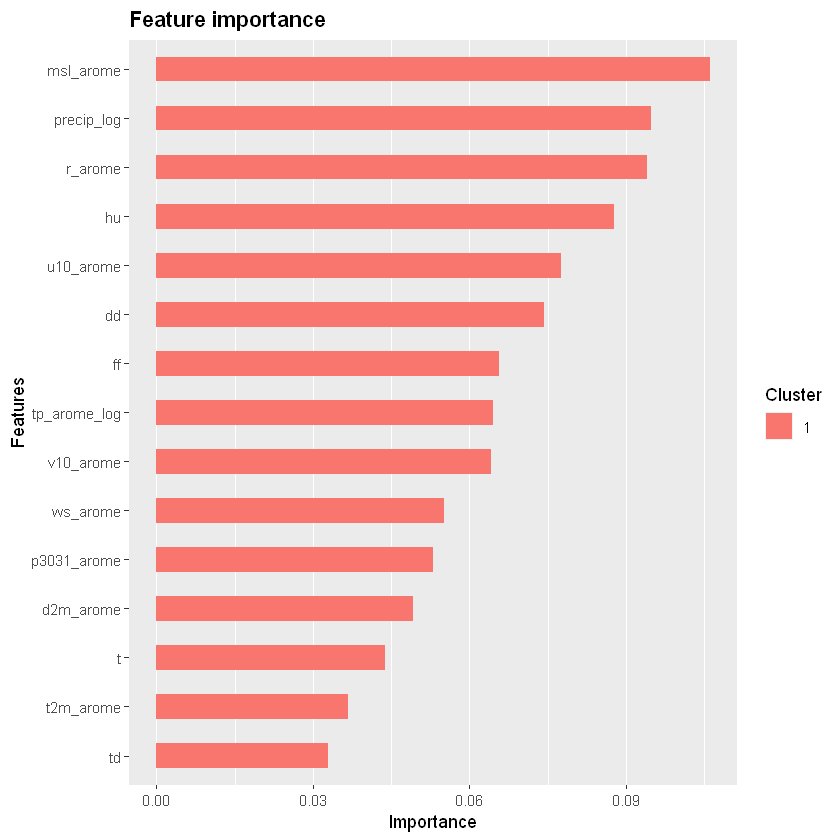

In [99]:
# plot
gp = xgb.ggplot.importance(importance_matrix)
print(gp) 